In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import cv2 
import os 
import glob 
img_dir1 = r"E:\Amir" # Enter Directory of all images 
data_path1 = os.path.join(img_dir1,'*jfif') 
files1 = glob.glob(data_path1)  
data1 = []
for j in files1: 
    img = cv2.imread(j)
    img.resize((28,28))
    data1.append(img) 

In [3]:
x1=np.array(data1)

In [4]:
img_dir2 = r"E:\Data"
data_path2 = os.path.join(img_dir2,'*jfif') 
files2 = glob.glob(data_path2) 
data2 = []
for i in files2: 
    img1 = cv2.imread(i) 
    img1.resize((28,28))
    data2.append(img1) 

In [5]:
x2=np.array(data2)

In [6]:
y1=np.zeros(20)
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [7]:
y2=np.ones(20)
y2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
data1[1].shape

(28, 28)

In [9]:
y=np.concatenate((y1,y2),axis=0)
print(y.shape)

x=np.concatenate((x1,x2),axis=0)
print(x.shape)

(40,)
(40, 28, 28)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 10,shuffle=True)

In [11]:
x_train.shape

(36, 28, 28)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dense,MaxPooling2D,Flatten


In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3) , input_shape = (28,28,1)))     #Input Layer
model.add(MaxPooling2D(2,2))
          
model.add(Conv2D(16, (3,3) , activation='relu'))      #Hidden Layer
model.add(MaxPooling2D(2,2))   

model.add(Conv2D(8, (3,3) , activation='relu'))       #Hidden Layer
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(4, activation = 'relu')) 

model.add(Dense(1, activation = 'sigmoid'))  #Output Layer

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 8)          0

In [14]:
history = model.fit(x_train , y_train , validation_split=(0.1) , epochs=50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 7.2570 - accuracy: 0.5000 - val_loss: 2.1439 - val_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 0s 57ms/step - loss: 2.9034 - accuracy: 0.5312 - val_loss: 1.1325 - val_accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 0s 56ms/step - loss: 1.4820 - accuracy: 0.5000 - val_loss: 0.6313 - val_accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 1.1177 - accuracy: 0.5000 - val_loss: 0.9571 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 1.3061 - accuracy: 0.5000 - val_loss: 0.7956 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 1.2470 - accuracy: 0.5000 - val_loss: 0.5180 - val_accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 1.0269 - accuracy: 0.5312 - val_loss: 0.4263 - val_accuracy: 0.7500
Epoch 8/50
1/1 [=============

In [15]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 2.7333 - accuracy: 0.2500


[2.733287811279297, 0.25]

In [16]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions

1/1 [==============================] - 0s 83ms/step


array([0, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(y_test,predictions)
print(cm)
print(accuracy_score(y_test,predictions))

[[1 0]
 [3 0]]
0.25


<AxesSubplot:>

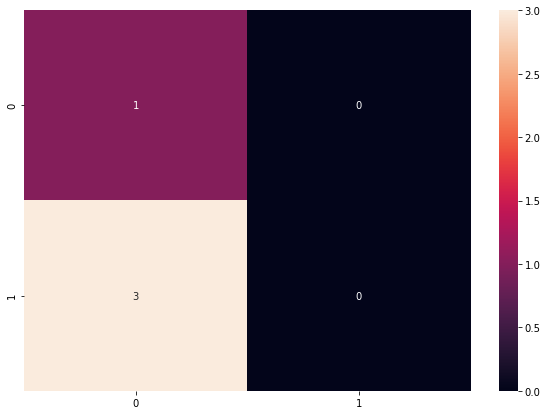

In [18]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
confusion_matrix = cm
sns.heatmap(confusion_matrix,annot = True,fmt = 'd')